In [44]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [28]:
data = pd.read_csv('titanic-passengers.csv', header='infer', sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

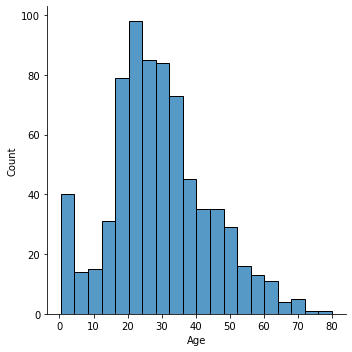

In [31]:
sns.displot(data["Age"])

In [6]:
data["Age"].skew()

0.3891077823008269

In [ ]:
#The Age variable is skewed to the right, so we will fill its nan values with the median rather than the mean

In [32]:
data["Age"].fillna(data["Age"].median(), inplace=True)

In [8]:
data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
B69            1
C62 C64        1
C148           1
E50            1
C54            1
Name: Cabin, Length: 147, dtype: int64

In [33]:
data["Cabin"].fillna("G6", inplace=True) #We've filled with the mode of Cabin
print("The percentage of the missing values in is : ",687/data['Cabin'].value_counts().sum()*100,"%")

The percentage of the missing values in is :  77.10437710437711 %


In [78]:
#We can ignore this variable in our model since 77% is too large


In [34]:
#preparing data for modelign
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   #convert survived variable into numerical
data["Sex"]=data["Sex"].map({"male": 1, "female": 0})   #convert sex variable into numerical
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


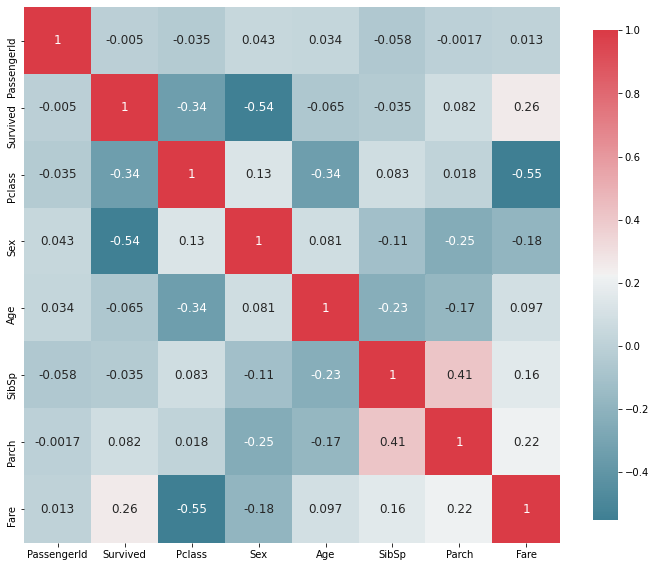

In [35]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map( data )

In [12]:
features = data.iloc[:,2:].columns.tolist()
target = data.iloc[:,1].name

In [36]:
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = st.spearmanr(x1,x2)[0]

In [37]:
# Printing all the correlated features value with respect to price which is target variable
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
Sex vs Survived,-0.543351
Pclass vs Survived,-0.339668
Fare vs Survived,0.323736
Cabin vs Survived,-0.312869
Ticket vs Survived,-0.163354
Parch vs Survived,0.138266
SibSp vs Survived,0.088879
Name vs Survived,-0.057343
Age vs Survived,-0.037004
Embarked vs Survived,NaN


In [38]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [63]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
clf = tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


[Text(205.2046092118998, 423.4357894736842, 'X[2] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(88.4616388308977, 400.5473684210526, 'X[1] <= 2.5\ngini = 0.39\nsamples = 252\nvalue = [67, 185]'),
 Text(33.782881002087684, 377.6589473684211, 'X[3] <= 2.5\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(29.123173277661795, 354.7705263157895, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(38.44258872651357, 354.7705263157895, 'X[6] <= 26.125\ngini = 0.087\nsamples = 132\nvalue = [6, 126]'),
 Text(25.62839248434238, 331.8821052631579, 'X[3] <= 55.5\ngini = 0.198\nsamples = 45\nvalue = [5, 40]'),
 Text(20.968684759916492, 308.99368421052634, 'X[0] <= 48.0\ngini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(16.308977035490607, 286.10526315789474, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(25.62839248434238, 286.10526315789474, 'X[4] <= 0.5\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(13.979123173277662, 263.21684210526314, 'X[0] <= 206.0\ngini = 0.

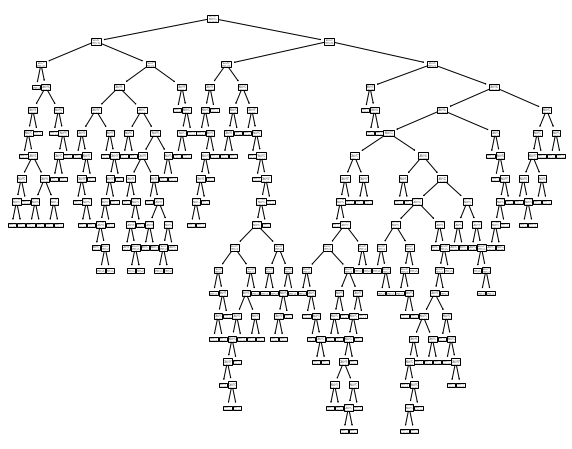

In [66]:
from sklearn import tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf)

In [68]:
dtree = tree.DecisionTreeClassifier(criterion="gini",splitter = 'random', max_leaf_nodes=10, min_samples_leaf = 5, max_depth=5)

In [71]:
clf = dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


In [ ]:
#Since we are dealing with categorical features (classification problem), the predicted category will be the mode of the categories on the elaf node, 
#in other words, a test sample that reaches this node has the highest probability of belonging to the class of the chosen
#node 
#Also the one with the least value of Gini, the better

In [72]:
#Random Forest
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [75]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8379888268156425


In [ ]:
from sklearn import tree
plt.figure(figsize=(10, 8))
tree.plot_tree(clf)

In [ ]:
#The Random Forest Algorithm gave more accurate results